In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load files needed(City and Ride Data)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
C_data=pd.read_csv(city_data)
R_data=pd.read_csv(ride_data)

# Combine the data into a single dataset
#Merging data from both csvs
cr=pd.merge(R_data,C_data,how="left",on=["city","city"])

# Display the data table for preview
cr.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#BUBBLE PLOT OF RIDE SHARING DATA

# Obtain the x and y coordinates for each of the three city types
rural=cr[cr["type"]=="Rural"]
suburban=cr[cr["type"]=="Suburban"]
urban=cr[cr["type"]=="Urban"]







In [16]:
#calculating means, count and driver count for each type of city

#Rural
ruralcount=rural.groupby(["city"]).count()["ride_id"]
ruralmean=rural.groupby(["city"]).mean()["fare"]
ruraldrivers=rural.groupby(["city"]).mean()["driver_count"]

#Suburban
subcount=suburban.groupby(["city"]).count()["ride_id"]
submean=suburban.groupby(["city"]).mean()["fare"]
subdrivers=suburban.groupby(["city"]).mean()["driver_count"]

#Urban
urbcount=urban.groupby(["city"]).count()["ride_id"]
urbmean=urban.groupby(["city"]).mean()["fare"]
urbdrivers=urban.groupby(["city"]).mean()["driver_count"]


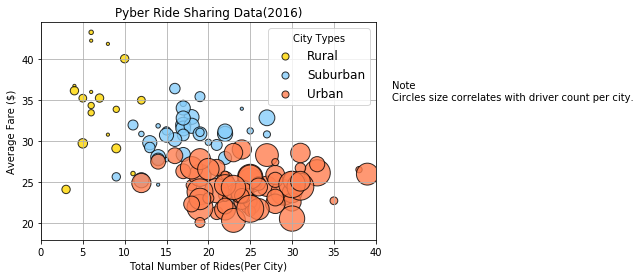

In [17]:
#BUILDING SCATTER PLOTS FOR THE CITY TYPES

#rural
plt.scatter(ruralcount,ruralmean,s=10*ruraldrivers,c="gold",edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Rural")

#suburban
plt.scatter(subcount,submean,s=10*subdrivers,c="lightskyblue",edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Suburban")

#urban
plt.scatter(urbcount,urbmean,s=10*urbdrivers,c="coral",edgecolor="black",linewidths=1,marker="o",alpha=0.8,label="Urban")


#Additional properties of the graph
plt.title("Pyber Ride Sharing Data(2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides(Per City)")
plt.xlim((0,40))
plt.grid(True)

#Legend
murugi=plt.legend(fontsize="large",mode="Expanded",numpoints=1,scatterpoints=1,loc="best",title="City Types",labelspacing=0.5)

murugi.legendHandles[0]._sizes=[50]
murugi.legendHandles[1]._sizes=[50]
murugi.legendHandles[2]._sizes=[50]

#Incorporation of text label regarding circle size
plt.text(42,35,"Note\nCircles size correlates with driver count per city.")

#save figure
plt.savefig("analysis/Fig1.png")

# Show plot
plt.show()

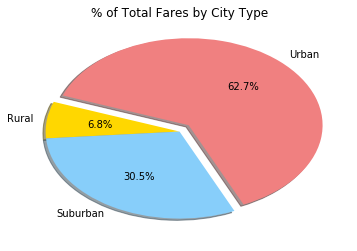

In [18]:
#TOTAL FARES BY CITY TYPE

# Calculate Type Percents
pct_types=cr.groupby(["type"]).sum()["fare"]/cr["fare"].sum()
# Build Pie Chart
plt.pie(pct_types,labels=["Rural","Suburban","Urban"],
       colors=["gold","lightskyblue","lightcoral"],explode=[0,0,0.1],
       autopct="%1.1f%%",shadow=True,startangle=160)
#Title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("analysis/Fig2.png")
#Show Figure
plt.show()


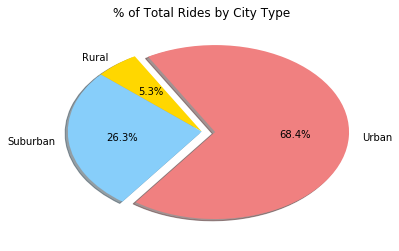

In [19]:
#TOTAL RIDES BY CITY TYPE

# Calculate Ride Percents
pct_rides=100*cr.groupby(["type"]).count()["ride_id"]/cr["ride_id"].count()

# Build Pie Chart
plt.pie(pct_rides,labels=["Rural","Suburban","Urban"],colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],autopct="%1.1f%%",shadow=True,startangle=120)

#Title of pieChart
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("analysis/Fig3.png")

#Show Figure
plt.show()


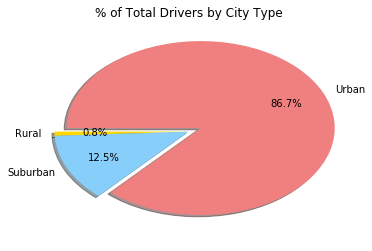

In [20]:
#TOTAL DRIVERS BY CITY TYPE

# Calculate Driver Percents
pct_drivers=100*cr.groupby(["type"]).sum()["driver_count"]/cr["driver_count"].sum()

# Build Pie Charts
plt.pie(pct_drivers,labels=["Rural","Suburban","Urban"],colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1],autopct="%1.1f%%",pctdistance=0.70,shadow=True,startangle=180)

# Title of Drivers pie chart
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("analysis/Fig4.png")

#Show Figure
plt.show()


# Trend Observations

The number of rides has an influence on driver count. From the chart(Fig 3), the urban cities  have the highest number of rides above 50% and rural areas have the lowest demand less than 10%. This has translated to high driver count in urban cities(86.7%),suburban cities(12.5%) and rural cities(0.8%).(Fig 4)

Rural areas do not generate much fares as the number of rides are below 10%(Fig2).Suburban drivers though less than 10% have a significant number of rides that generate fares approx 35% of the total amount of fare generated in all city types.

The biggest gainer in fares all factors inclusive is the urban city types that have the highest number of drivers and rides more than double those of rural and suburban cities combined.

